<a href="https://colab.research.google.com/github/Ale2611/Euro2024/blob/main/Euro2024_Matches.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Importación de bibliotecas y agregación de un csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("Euro_2024_Matches.csv")

In [ ]:
#Exploración del df
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 86 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   stadium                         51 non-null     object 
 1   attendance                      51 non-null     object 
 2   home_team                       51 non-null     object 
 3   away_team                       51 non-null     object 
 4   home_goals                      51 non-null     int64  
 5   away_goals                      51 non-null     int64  
 6   Home Expected goals(xG)         51 non-null     float64
 7   Home Total shots                51 non-null     int64  
 8   Home Shots on target            51 non-null     int64  
 9   Home Big chances                51 non-null     int64  
 10  Home Big chances missed         51 non-null     int64  
 11  Home Accurate passes            51 non-null     object 
 12  Home Fouls committed            51 non

In [ ]:
#exploración del df
df.columns

Index(['stadium', 'attendance', 'home_team', 'away_team', 'home_goals',
       'away_goals', 'Home Expected goals(xG)', 'Home Total shots',
       'Home Shots on target', 'Home Big chances', 'Home Big chances missed',
       'Home Accurate passes', 'Home Fouls committed', 'Home Corners',
       'Home Total shots.', 'Home Shots off target', 'Home Shots on target.',
       'Home Blocked shots', 'Home Hit woodwork', 'Home Shots inside box',
       'Home Shots outside box', 'Home Expected goals (xG)',
       'Home xG open play', 'Home xG set play', 'Home Non-penalty xG',
       'Home xG on target (xGOT)', 'Home Passes', 'Home Accurate passes.1',
       'Home Own half', 'Home Opposition half', 'Home Accurate long balls',
       'Home Accurate crosses', 'Home Throws',
       'Home Touches in opposition box', 'Home Offsides', 'Home Yellow cards',
       'Home Red cards', 'Home Tackles won', 'Home Interceptions',
       'Home Blocks', 'Home Clearances', 'Home Keeper saves', 'Home Duels won',
 

In [ ]:
#exploración de df
df.head()

,stadium,attendance,home_team,away_team,home_goals,away_goals,Home Expected goals(xG),Home Total shots,Home Shots on target,Home Big chances,...,Away Red cards,Away Tackles won,Away Interceptions,Away Blocks,Away Clearances,Away Keeper saves,Away Duels won,Away Ground duels won,Away Aerial duels won,Away Successful dribbles
0,Fuball Arena Mnchen,"65,052",Germany,Scotland,5,1,2.15,20,10,1,...,1,8(53%),6,5,22,5,41,34(58%),7(44%),5(56%)
1,Cologne Stadium,"41,676",Hungary,Switzerland,1,3,1.25,6,2,3,...,0,9(69%),6,1,17,1,41,26(45%),15(48%),5(38%)
2,Olympiastadion Berlin,"68,844",Spain,Croatia,3,0,2.01,11,5,4,...,0,10(71%),9,3,4,2,47,37(51%),10(34%),10(77%)
3,BVB Stadion Dortmund,"60,512",Italy,Albania,2,1,1.56,17,5,5,...,0,5(63%),13,6,15,3,26,16(39%),10(63%),2(29%)
4,Volksparkstadion,"48,117",Poland,Netherlands,1,2,1.32,12,7,2,...,0,11(79%),3,1,21,6,54,38(56%),16(64%),14(70%)


In [ ]:
#Partido con mas goles
df['total_goles'] = df['home_goals'] + df['away_goals']
max_goles_idx = df["total_goles"].idxmax()
partido_max_goles = df.loc[max_goles_idx, ['home_team', 'away_team']]
print(partido_max_goles.values)

['Germany' 'Scotland']


In [ ]:
#Partido con más espectador
df['attendance'] = df['attendance'].astype(str)
df['attendance'] = df['attendance'].str.replace(',', '').astype(int)
max_espectador = df["attendance"].idxmax()
partido_max_espectador = df.loc[max_espectador, ['home_team', 'away_team']]
partido_max_espectador



,47
home_team,Netherlands
away_team,Turkiye


In [ ]:
#PartidoS con más espectador

max_espectador_2 = df["attendance"].max()
partidos_max_asistencia = df[df['attendance'] == max_espectador_2]

partidos_max_espectador = df.loc[max_espectador, ['home_team', 'away_team',"attendance"]]
partidos_max_espectador

,47
home_team,Netherlands
away_team,Turkiye
attendance,70091


In [ ]:
#Ver los partidos de la selección de suiza
suiza = "Switzerland"
partidos_suiza = df[(df['home_team'] == suiza) | (df['away_team'] == suiza)]
#partidos_suiza
partidos_suiza[["home_team","away_team","home_goals","away_goals"]]


,home_team,away_team,home_goals,away_goals
1,Hungary,Switzerland,1,3
14,Scotland,Switzerland,1,1
25,Switzerland,Germany,1,1
36,Switzerland,Italy,2,0
46,England,Switzerland,1,1


In [ ]:
#Total goles suiza
# Calcular el número total de goles anotados por el equipo
# Si el equipo es 'home_team', sumar los goles en 'home_goals'
# Si el equipo es 'away_team', sumar los goles en 'away_goals'
#una función lambda suma los goles anotados por el equipo en cada partido:
total_goles = partidos_suiza.apply(
    lambda row: row['home_goals'] if row['home_team'] == suiza else row['away_goals'],
    axis=1
).sum()
print(f"Suiza marcó un total de {total_goles} goles")

Suiza marcó un total de 8 goles


In [ ]:
#Ver todos los partidos jugados en el Olympiastadion Berlin

cancha= "Olympiastadion Berlin"
partidos_enberlin = df[(df['stadium'] == cancha)]
partidos_enberlin[["stadium","home_team","away_team","home_goals","away_goals"]]





,stadium,home_team,away_team,home_goals,away_goals
2,Olympiastadion Berlin,Spain,Croatia,3,0
19,Olympiastadion Berlin,Poland,Austria,1,3
29,Olympiastadion Berlin,Netherlands,Austria,2,3
36,Olympiastadion Berlin,Switzerland,Italy,2,0
47,Olympiastadion Berlin,Netherlands,Turkiye,2,1
50,Olympiastadion Berlin,Spain,England,2,1


In [ ]:
#Ver los totales de lo que se jugó en el Olympiastadion
total_home_goals = partidos_enberlin['home_goals'].sum()
total_away_goals = partidos_enberlin['away_goals'].sum()
total_goles = total_home_goals + total_away_goals

totales = pd.DataFrame({
    'stadium': ['Total'],
    'home_team': [''],
    'away_team': [''],
    'home_goals': [total_home_goals],
    'away_goals': [total_away_goals]
})

partidos_enberlin_totales = pd.concat([partidos_enberlin, totales], ignore_index=True)

partidos_enberlin_totales



,stadium,attendance,home_team,away_team,home_goals,away_goals,Home Expected goals(xG),Home Total shots,Home Shots on target,Home Big chances,...,Away Tackles won,Away Interceptions,Away Blocks,Away Clearances,Away Keeper saves,Away Duels won,Away Ground duels won,Away Aerial duels won,Away Successful dribbles,total_goles
2,Olympiastadion Berlin,68844.0,Spain,Croatia,3,0,2.01,11.0,5.0,4.0,...,10(71%),9.0,3.0,4.0,2.0,47.0,37(51%),10(34%),10(77%),3.0
19,Olympiastadion Berlin,69455.0,Poland,Austria,1,3,1.68,15.0,3.0,2.0,...,5(45%),16.0,7.0,19.0,2.0,43.0,30(50%),13(52%),5(63%),4.0
29,Olympiastadion Berlin,68363.0,Netherlands,Austria,2,3,1.73,11.0,2.0,4.0,...,16(70%),10.0,3.0,14.0,0.0,49.0,39(48%),10(38%),7(70%),5.0
36,Olympiastadion Berlin,68172.0,Switzerland,Italy,2,0,1.25,16.0,4.0,2.0,...,10(83%),8.0,6.0,17.0,2.0,39.0,28(50%),11(58%),7(58%),2.0
47,Olympiastadion Berlin,70091.0,Netherlands,Turkiye,2,1,1.09,11.0,4.0,2.0,...,7(41%),12.0,3.0,15.0,3.0,47.0,37(60%),10(45%),5(42%),3.0
50,Olympiastadion Berlin,65600.0,Spain,England,2,1,1.77,16.0,6.0,5.0,...,12(67%),5.0,5.0,27.0,4.0,43.0,33(60%),10(43%),4(33%),3.0
0,Total,NaN,,,12,8,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
#Ver los partidos de suiza y los totales
suiza = "Switzerland"
partidos_suiza = df[(df['home_team'] == suiza) | (df['away_team'] == suiza)]

total_home_goals = partidos_suiza['home_goals'].sum()
total_away_goals = partidos_suiza['away_goals'].sum()
total_goles = total_home_goals + total_away_goals

totales = pd.DataFrame({
    'stadium': ['Total'],
    'home_team': [''],
    'away_team': [''],
    'home_goals': [total_home_goals],
    'away_goals': [total_away_goals]
})

partidos_suiza_totales = pd.concat([partidos_suiza, totales], ignore_index=True)

partidos_suiza_totales




,stadium,attendance,home_team,away_team,home_goals,away_goals,Home Expected goals(xG),Home Total shots,Home Shots on target,Home Big chances,...,Away Red cards,Away Tackles won,Away Interceptions,Away Blocks,Away Clearances,Away Keeper saves,Away Duels won,Away Ground duels won,Away Aerial duels won,Away Successful dribbles
0,Cologne Stadium,"41,676",Hungary,Switzerland,1,3,1.25,6.0,2.0,3.0,...,0.0,9(69%),6.0,1.0,17.0,1.0,41.0,26(45%),15(48%),5(38%)
1,Cologne Stadium,"42,711",Scotland,Switzerland,1,1,0.76,12.0,3.0,2.0,...,0.0,5(56%),8.0,3.0,24.0,2.0,38.0,25(54%),13(34%),5(56%)
2,Frankfurt Arena,"46,685",Switzerland,Germany,1,1,0.60,4.0,3.0,1.0,...,0.0,9(53%),7.0,0.0,11.0,2.0,48.0,40(57%),8(50%),10(67%)
3,Olympiastadion Berlin,"68,172",Switzerland,Italy,2,0,1.25,16.0,4.0,2.0,...,0.0,10(83%),8.0,6.0,17.0,2.0,39.0,28(50%),11(58%),7(58%)
4,Dsseldorf Arena,"46,907",England,Switzerland,1,1,0.65,13.0,3.0,0.0,...,0.0,12(63%),3.0,8.0,30.0,2.0,42.0,34(42%),8(40%),7(54%)
5,Total,NaN,,,6,6,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
#agregar una columna con el nombre del equipo ganador
df['Winner'] = df.apply(lambda row: row['home_team'] if row['home_goals'] > row['away_goals']
                        else row['away_team'] if row['away_goals'] > row['home_goals'] else 'Draw', axis=1)
df.head()

,stadium,attendance,home_team,away_team,home_goals,away_goals,Home Expected goals(xG),Home Total shots,Home Shots on target,Home Big chances,...,Away Tackles won,Away Interceptions,Away Blocks,Away Clearances,Away Keeper saves,Away Duels won,Away Ground duels won,Away Aerial duels won,Away Successful dribbles,Winner
0,Fuball Arena Mnchen,"65,052",Germany,Scotland,5,1,2.15,20,10,1,...,8(53%),6,5,22,5,41,34(58%),7(44%),5(56%),Germany
1,Cologne Stadium,"41,676",Hungary,Switzerland,1,3,1.25,6,2,3,...,9(69%),6,1,17,1,41,26(45%),15(48%),5(38%),Switzerland
2,Olympiastadion Berlin,"68,844",Spain,Croatia,3,0,2.01,11,5,4,...,10(71%),9,3,4,2,47,37(51%),10(34%),10(77%),Spain
3,BVB Stadion Dortmund,"60,512",Italy,Albania,2,1,1.56,17,5,5,...,5(63%),13,6,15,3,26,16(39%),10(63%),2(29%),Italy
4,Volksparkstadion,"48,117",Poland,Netherlands,1,2,1.32,12,7,2,...,11(79%),3,1,21,6,54,38(56%),16(64%),14(70%),Netherlands


In [ ]:
# Filtrar las filas donde la Nati es el equipo local o visitante
Suiza = "Switzerland"
df_home = df[df['home_team'] == Suiza]
df_away = df[df['away_team'] == Suiza]


In [ ]:
# Crear columnas para identificar el equipo contrario y los goles anotados por Suiza
df_home['opponent'] = df_home['away_team']
df_home['swiss_goals'] = df_home['home_goals']

df_away['opponent'] = df_away['home_team']
df_away['swiss_goals'] = df_away['away_goals']

<ipython-input-24-d2926d56629d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_home['opponent'] = df_home['away_team']
<ipython-input-24-d2926d56629d>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_home['swiss_goals'] = df_home['home_goals']
<ipython-input-24-d2926d56629d>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/

In [ ]:
df_away

,stadium,attendance,home_team,away_team,home_goals,away_goals,Home Expected goals(xG),Home Total shots,Home Shots on target,Home Big chances,...,Away Blocks,Away Clearances,Away Keeper saves,Away Duels won,Away Ground duels won,Away Aerial duels won,Away Successful dribbles,Winner,opponent,swiss_goals
1,Cologne Stadium,"41,676",Hungary,Switzerland,1,3,1.25,6,2,3,...,1,17,1,41,26(45%),15(48%),5(38%),Switzerland,Hungary,3
14,Cologne Stadium,"42,711",Scotland,Switzerland,1,1,0.76,12,3,2,...,3,24,2,38,25(54%),13(34%),5(56%),Draw,Scotland,1
46,Dsseldorf Arena,"46,907",England,Switzerland,1,1,0.65,13,3,0,...,8,30,2,42,34(42%),8(40%),7(54%),Draw,England,1


In [ ]:
# Unir ambos DataFrames
df_swiss = pd.concat([df_home, df_away])
df_swiss

,stadium,attendance,home_team,away_team,home_goals,away_goals,Home Expected goals(xG),Home Total shots,Home Shots on target,Home Big chances,...,Away Blocks,Away Clearances,Away Keeper saves,Away Duels won,Away Ground duels won,Away Aerial duels won,Away Successful dribbles,Winner,opponent,swiss_goals
25,Frankfurt Arena,"46,685",Switzerland,Germany,1,1,0.60,4,3,1,...,0,11,2,48,40(57%),8(50%),10(67%),Draw,Germany,1
36,Olympiastadion Berlin,"68,172",Switzerland,Italy,2,0,1.25,16,4,2,...,6,17,2,39,28(50%),11(58%),7(58%),Switzerland,Italy,2
1,Cologne Stadium,"41,676",Hungary,Switzerland,1,3,1.25,6,2,3,...,1,17,1,41,26(45%),15(48%),5(38%),Switzerland,Hungary,3
14,Cologne Stadium,"42,711",Scotland,Switzerland,1,1,0.76,12,3,2,...,3,24,2,38,25(54%),13(34%),5(56%),Draw,Scotland,1
46,Dsseldorf Arena,"46,907",England,Switzerland,1,1,0.65,13,3,0,...,8,30,2,42,34(42%),8(40%),7(54%),Draw,England,1


In [ ]:
# Agrupar por equipo contrario y sumar los goles
goals_by_opponent = df_swiss.groupby('opponent')['swiss_goals'].sum()
goals_by_opponent

,swiss_goals
opponent,
England,1
Germany,1
Hungary,3
Italy,2
Scotland,1


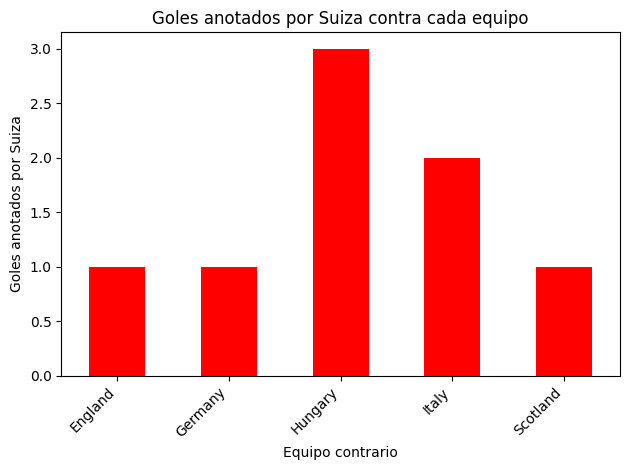

In [ ]:

# Crear el gráfico de barras
goals_by_opponent.plot(kind='bar', color='red')

# Configurar el gráfico
plt.title('Goles anotados por Suiza contra cada equipo')
plt.xlabel('Equipo contrario')
plt.ylabel('Goles anotados por Suiza')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Mostrar el gráfico
plt.show()

In [ ]:
# Filtrar las filas donde la Nati es el equipo local o visitante
Suiza = "Switzerland"
df_home = df[df['home_team'] == Suiza]
df_away = df[df['away_team'] == Suiza]

# Crear columnas para identificar el equipo contrario y los goles anotados por Suiza
df_home['opponent'] = df_home['away_team']
df_home['swiss_shots'] = df_home['Home Total shots']

df_away['opponent'] = df_away['home_team']
df_away['swiss_shots'] = df_away['Away Total shots']

<ipython-input-32-f6adb4380193>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_home['opponent'] = df_home['away_team']
<ipython-input-32-f6adb4380193>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_home['swiss_shots'] = df_home['Home Total shots']
<ipython-input-32-f6adb4380193>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/panda

In [ ]:
# Unir ambos DataFrames
df_swiss = pd.concat([df_home, df_away])
df_swiss

,stadium,attendance,home_team,away_team,home_goals,away_goals,Home Expected goals(xG),Home Total shots,Home Shots on target,Home Big chances,...,Away Blocks,Away Clearances,Away Keeper saves,Away Duels won,Away Ground duels won,Away Aerial duels won,Away Successful dribbles,Winner,opponent,swiss_shots
25,Frankfurt Arena,"46,685",Switzerland,Germany,1,1,0.60,4,3,1,...,0,11,2,48,40(57%),8(50%),10(67%),Draw,Germany,4
36,Olympiastadion Berlin,"68,172",Switzerland,Italy,2,0,1.25,16,4,2,...,6,17,2,39,28(50%),11(58%),7(58%),Switzerland,Italy,16
1,Cologne Stadium,"41,676",Hungary,Switzerland,1,3,1.25,6,2,3,...,1,17,1,41,26(45%),15(48%),5(38%),Switzerland,Hungary,15
14,Cologne Stadium,"42,711",Scotland,Switzerland,1,1,0.76,12,3,2,...,3,24,2,38,25(54%),13(34%),5(56%),Draw,Scotland,11
46,Dsseldorf Arena,"46,907",England,Switzerland,1,1,0.65,13,3,0,...,8,30,2,42,34(42%),8(40%),7(54%),Draw,England,11


In [ ]:
# Agrupar por equipo contrario y sumar los disparos
shots_by_opponent = df_swiss.groupby('opponent')['swiss_shots'].sum()
shots_by_opponent

,swiss_shots
opponent,
England,11
Germany,4
Hungary,15
Italy,16
Scotland,11


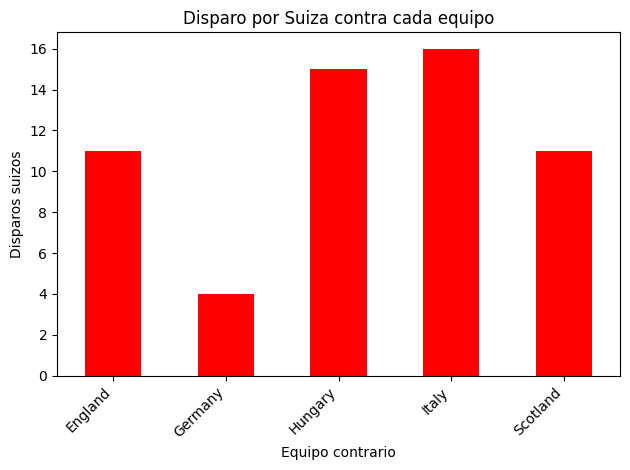

In [ ]:
# Crear el gráfico de barras
shots_by_opponent.plot(kind='bar', color='red')

# Configurar el gráfico
plt.title('Disparo por Suiza contra cada equipo')
plt.xlabel('Equipo contrario')
plt.ylabel('Disparos suizos')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Mostrar el gráfico
plt.show()

In [ ]:
#Ahora quiero ver un gráfico de barra de las attendance
suiza = "Switzerland"
partidos_suiza = df[(df['home_team'] == suiza) | (df['away_team'] == suiza)]
partidos_suiza

,stadium,attendance,home_team,away_team,home_goals,away_goals,Home Expected goals(xG),Home Total shots,Home Shots on target,Home Big chances,...,Away Red cards,Away Tackles won,Away Interceptions,Away Blocks,Away Clearances,Away Keeper saves,Away Duels won,Away Ground duels won,Away Aerial duels won,Away Successful dribbles
1,Cologne Stadium,"41,676",Hungary,Switzerland,1,3,1.25,6,2,3,...,0,9(69%),6,1,17,1,41,26(45%),15(48%),5(38%)
14,Cologne Stadium,"42,711",Scotland,Switzerland,1,1,0.76,12,3,2,...,0,5(56%),8,3,24,2,38,25(54%),13(34%),5(56%)
25,Frankfurt Arena,"46,685",Switzerland,Germany,1,1,0.60,4,3,1,...,0,9(53%),7,0,11,2,48,40(57%),8(50%),10(67%)
36,Olympiastadion Berlin,"68,172",Switzerland,Italy,2,0,1.25,16,4,2,...,0,10(83%),8,6,17,2,39,28(50%),11(58%),7(58%)
46,Dsseldorf Arena,"46,907",England,Switzerland,1,1,0.65,13,3,0,...,0,12(63%),3,8,30,2,42,34(42%),8(40%),7(54%)


In [ ]:
attendance_by_opponent = partidos_suiza.groupby('stadium')['attendance'].sum()
attendance_by_opponent

,attendance
stadium,
Cologne Stadium,"41,67642,711"
Dsseldorf Arena,"46,907"
Frankfurt Arena,"46,685"
Olympiastadion Berlin,"68,172"
